In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('..')
import absorption_line_vel as vel
from absorption_line_vel import SpectrumSN_Lines, AbsorbLine

# read spec data
z = 0.0307
spec = '../../spectroscopy/ZTF20aayhacx_20200521_P60_v2.ascii'
Spec1 = SpectrumSN_Lines(spec, z)

# 20200521_P60

## Si II 6355

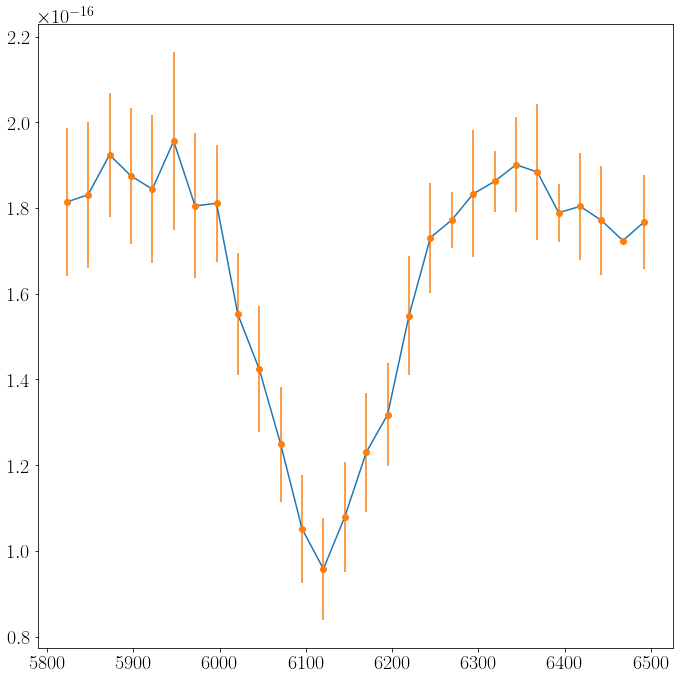

In [3]:
Spec1.plot_line_region(5800, 6500)

In [4]:
Spec1.add_line('SiII_6355', 5850, 6350, lines=[6371.359, 6347.103])

20 points within 5850.00 and 6350.00 angstroms.


../absorption_line_vel.py:149: UserWarning: <=5 points within the wavelength range!
  warnings.warn(


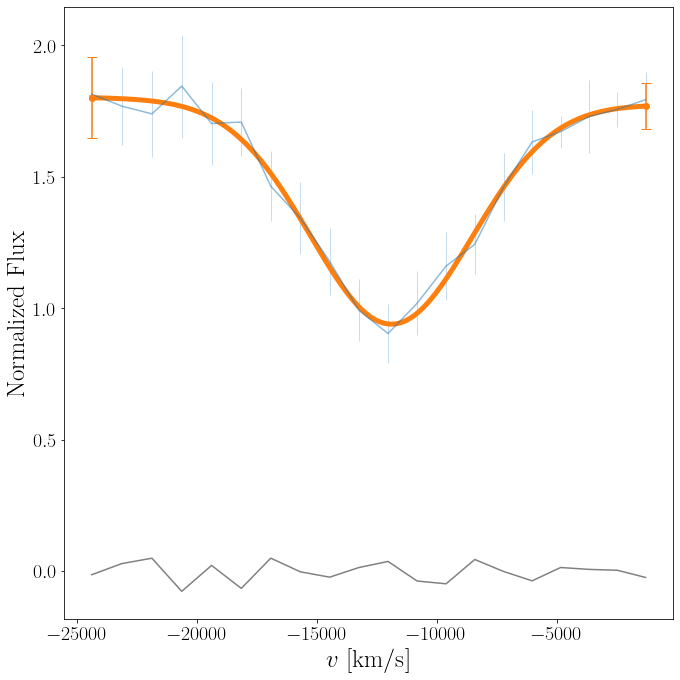

LS estimation:
Velocity pvf: -11346 km/s


In [5]:
Spec1.line['SiII_6355'].LS_estimator()

Normalize factor = 0.269


  7%|▋         | 3500/50000 [01:28<19:36, 39.53it/s]


MCMC results:
Velocity pvf: -11329 pm 76 km/s


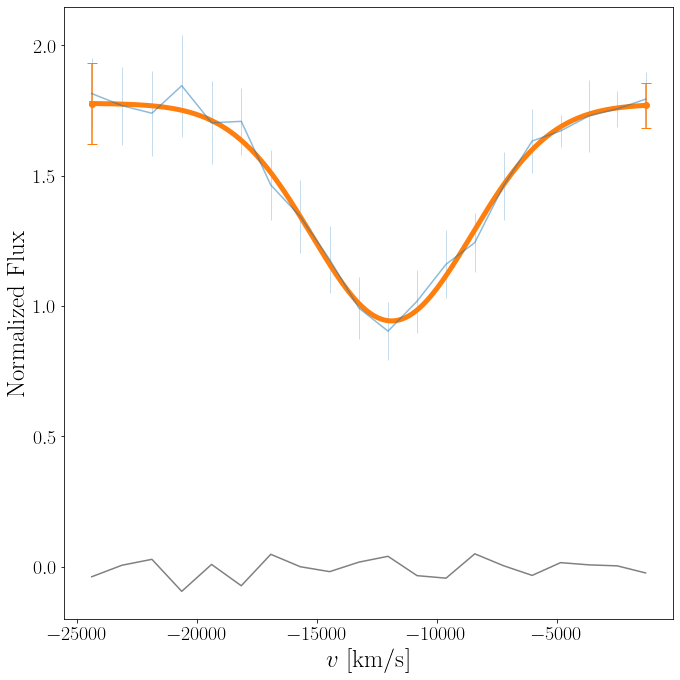

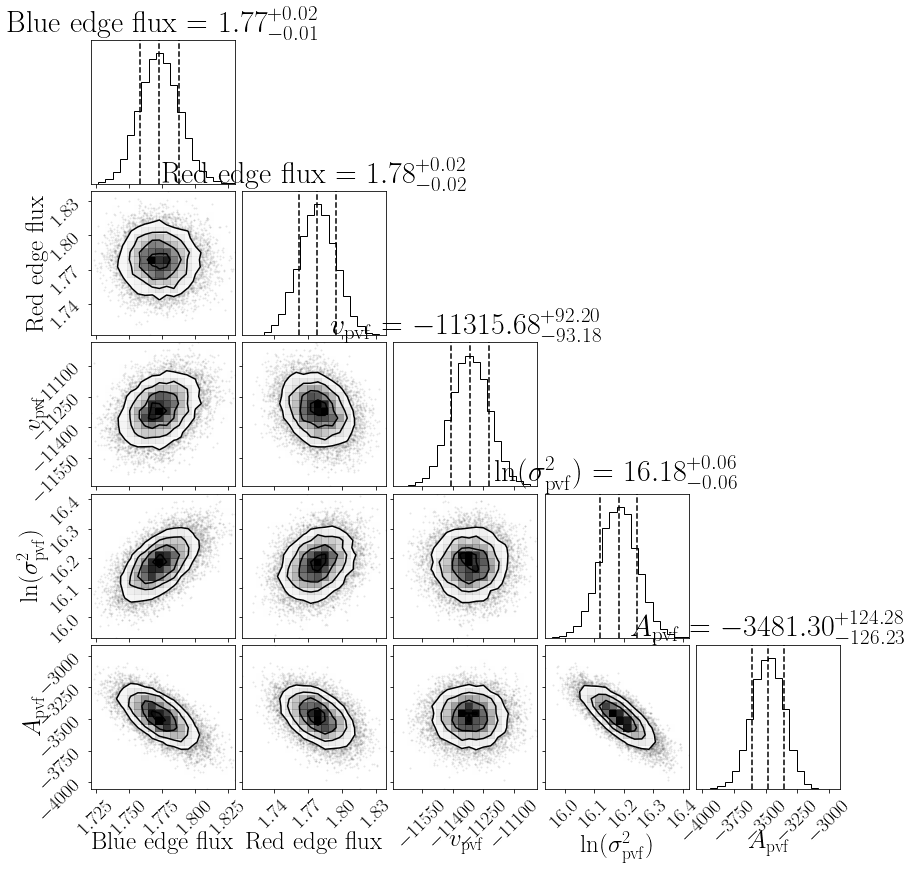

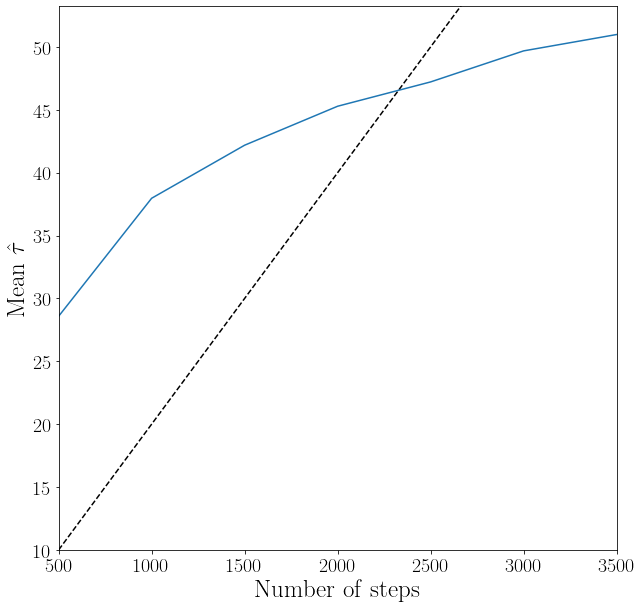

In [6]:
sampler = Spec1.line['SiII_6355'].MCMC_sampler(normalize_unc=True,
                                               Plot_mcmc=True,
                                               Plot_tau=True)

## Ca II IRT

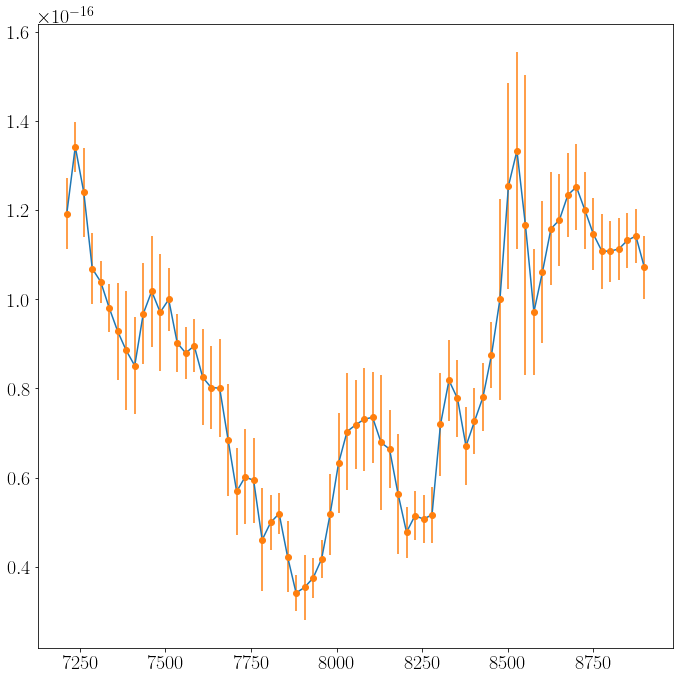

In [7]:
Spec1.plot_line_region(7200, 8900)

In [8]:
Spec1.add_line('CaII_IRT', 7450, 8750, lines=[8498.018, 8542.089, 8662.140])

52 points within 7450.00 and 8750.00 angstroms.


../absorption_line_vel.py:149: UserWarning: <=5 points within the wavelength range!
  warnings.warn(


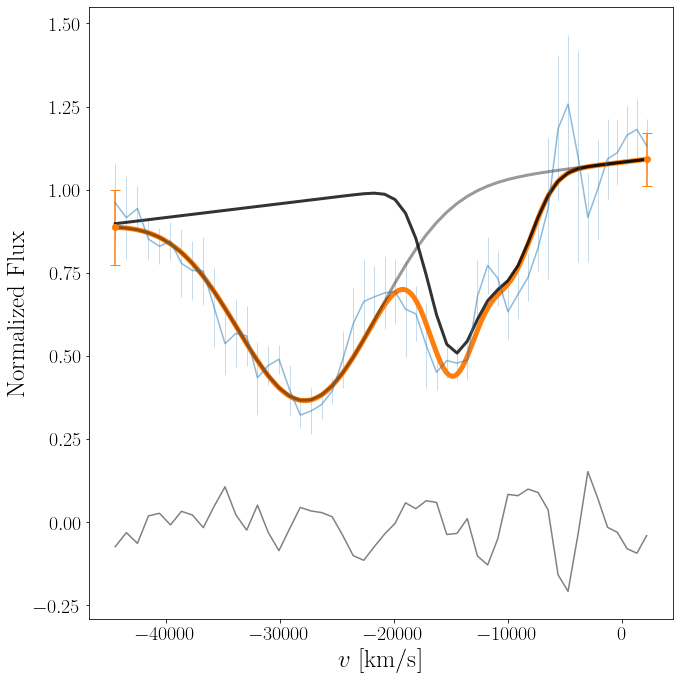

LS estimation:
Velocity pvf: -9756 km/s
Velocity hvf: -24134 km/s


In [9]:
Spec1.line['CaII_IRT'].LS_estimator(guess=(1, 1, -10000, 15, -1000, -25000, 15, -1000))

  0%|          | 0/1000 [00:00<?, ?it/s]

Normalize factor = 0.764


  0%|          | 3/50000 [00:00<31:33, 26.40it/s]

MCMC results:
Velocity pvf: -9639 pm 205 km/s
Velocity hvf: -24390 pm 323 km/s
Normalize factor = 0.764


 10%|█         | 5000/50000 [02:54<26:13, 28.60it/s]  


MCMC results:
Velocity pvf: -9615 pm 217 km/s
Velocity hvf: -24578 pm 320 km/s


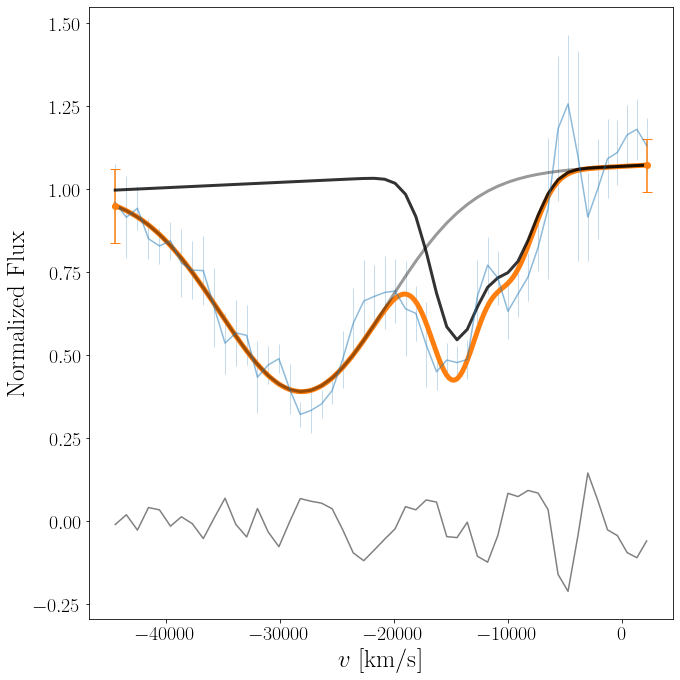

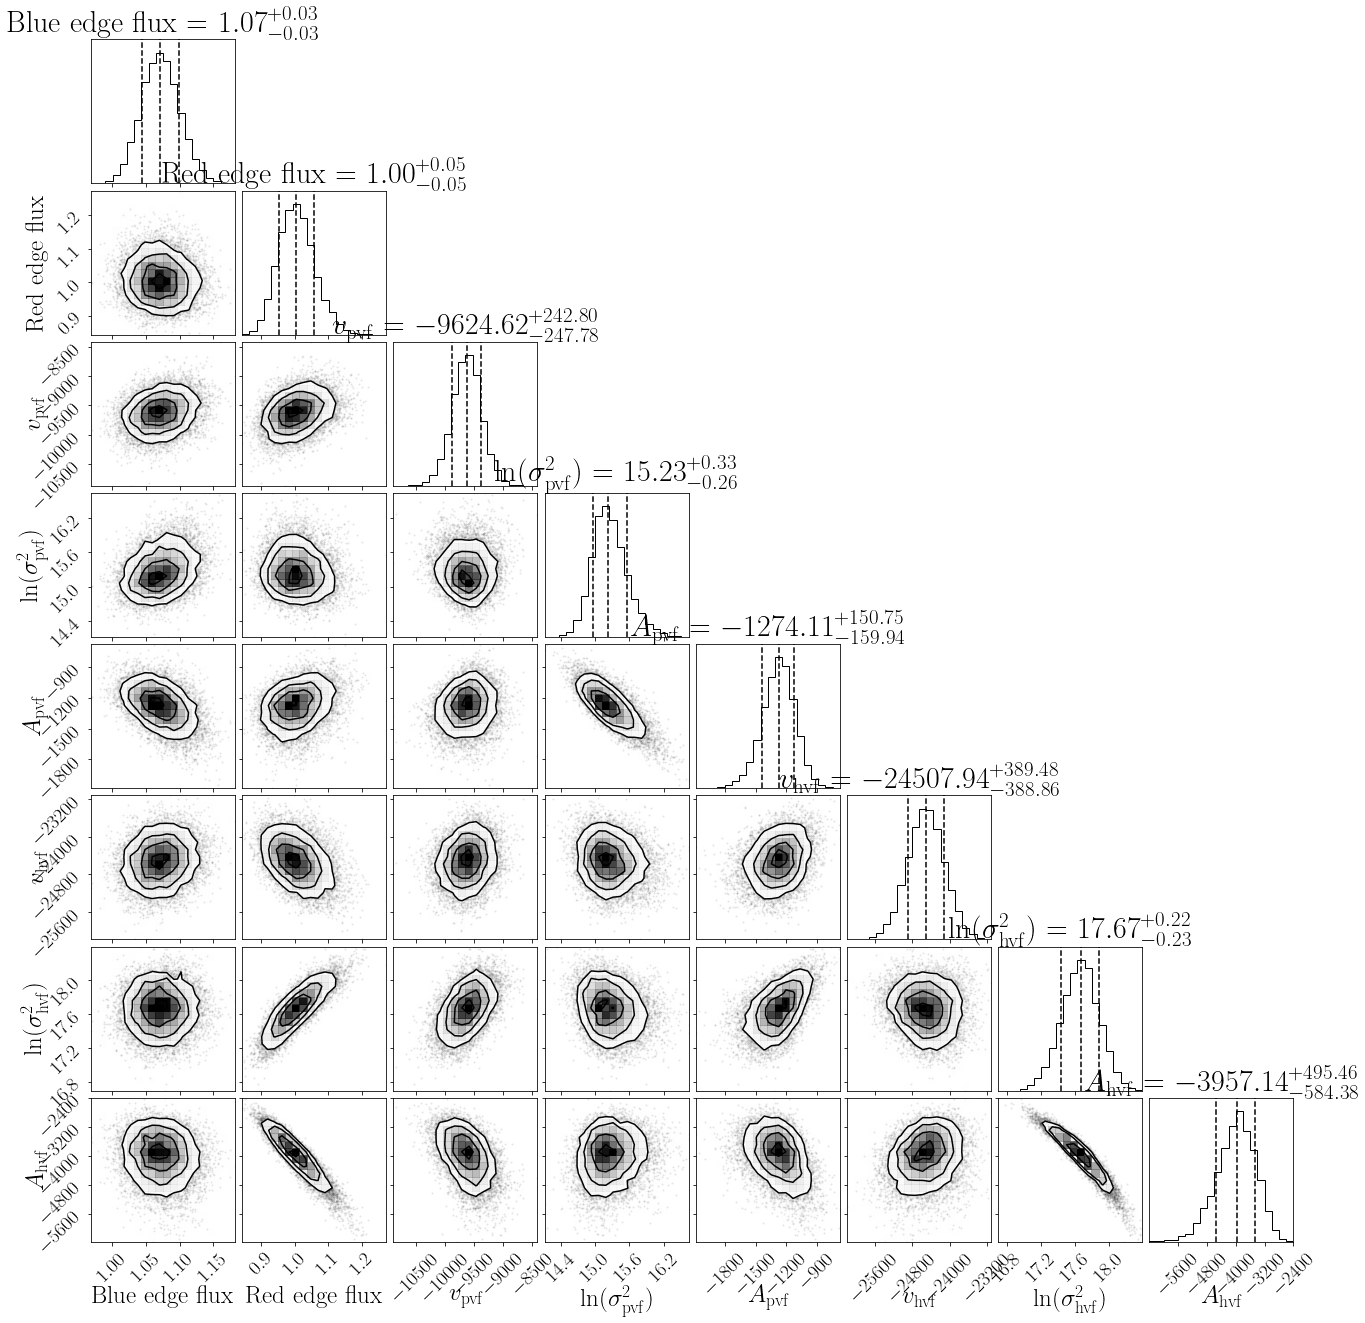

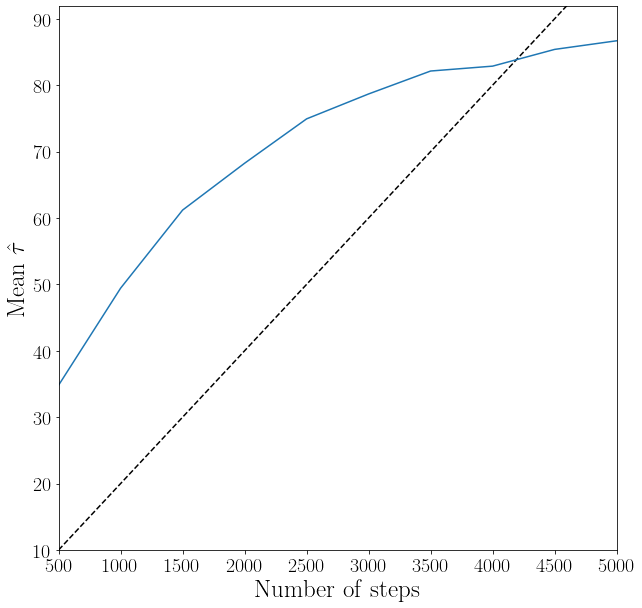

In [10]:
mu_pvf_prior = Spec1.line['SiII_6355'].theta_MCMC[2]
var_pvf_prior = 2e3**2
sampler = Spec1.line['CaII_IRT'].MCMC_sampler(mu_pvf=mu_pvf_prior,
                                              var_pvf=var_pvf_prior,
                                              initial=[],
                                              normalize_unc=True,
                                              max_nsteps=1000,
                                              Plot_model=False)
sampler = Spec1.line['CaII_IRT'].MCMC_sampler(
    mu_pvf=mu_pvf_prior,
    var_pvf=var_pvf_prior,
    initial=Spec1.line['CaII_IRT'].theta_MCMC,
    normalize_unc=True,
    Plot_mcmc=True,
    Plot_tau=True)